# Project 4 b 
## Chinagorom Evans Mbaraonye

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state = 42, test_size=0.2)



In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

n_estimators = [int(i) for i in np.linspace(start=200, stop =600, num = 5) ]
max_leaf_nodes = [int(i) for i in np.linspace(start=15, stop=50, num = 5 )]


param_grid = {
    'n_estimators': n_estimators,
    'max_leaf_nodes': max_leaf_nodes
}
random_reg = RandomForestClassifier(random_state=42)
randomForest = GridSearchCV(random_reg, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True, verbose = 1, n_jobs=-1)

randomForest.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   28.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [3]:
from sklearn.metrics import mean_squared_error

pred_model = randomForest.best_estimator_
print("Accuracy on the training data: ",pred_model.score(X_train, y_train) )
print("Accuracy on the test set: ", pred_model.score(X_test, y_test))

Accuracy on the training data:  1.0
Accuracy on the test set:  0.9649122807017544


In [4]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(randomForest, X_train, y_train.ravel(), cv = 5)

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   26.4s finished


Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   26.8s finished


Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   26.4s finished


Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   27.0s finished


Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   26.3s finished


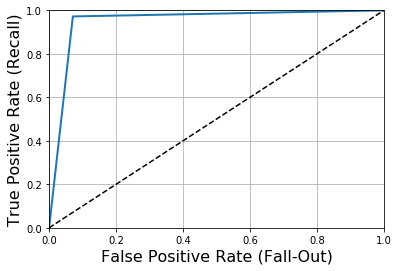

In [5]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                          
plot_roc_curve(fpr, tpr)
plt.show()

In [6]:
from sklearn.metrics import roc_auc_score

print("Area under the curve : ", roc_auc_score(y_train, y_scores))

Area under the curve :  0.9505110274341043


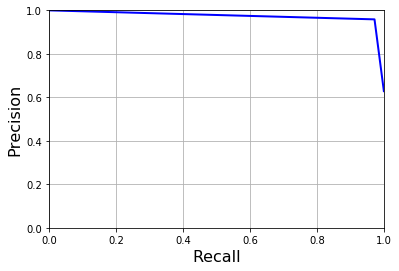

In [7]:
from sklearn.metrics import precision_recall_curve
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [9]:
from sklearn.metrics import precision_score, recall_score
threshold_precision = thresholds[np.argmax(precisions >= 0.95)]

y_train_pred_95 = (y_scores >= threshold_precision)

print("Precision score : " , precision_score(y_train, y_train_pred_95))

print("Recall score : " , recall_score(y_train, y_train_pred_95))


Precision score :  0.9586206896551724
Recall score :  0.972027972027972


Using a threshold that gives at least a 95% precision, I get the ratio of true positives among all the positives to be 95.86% while the ratio of of positive instances that are correctly detected by the classifier to be 97.2%